# Student Stress Analysis Project

Во нашиот проект се работеше со два  датасети. Првиот датасет, кој содржи конкретни и квантитативни психолошки, академски, социјални и здравствени индикатори, беше користен за сите анализа и кластеризации (KMeans, DBSCAN и PCA). 

Овој датасет има колони :

anxiety_level – ниво на анксиозност кај студентот

self_esteem – самодоверба и перцепција за себе

mental_health_history – дали студентот има историја на ментални здравствени проблеми

depression – ниво на депресија

headache – фреквенција на главоболки

blood_pressure – крвен притисок

sleep_quality – квалитет на спиење

breathing_problem – проблеми со дишењето

noise_level – изложеност на бучава

living_conditions – квалитет на животната средина

bullying – искуство со насилство или малтретирање

stress_level – проценето ниво на стрес

study_load – обем на академски обврски

academic_performance – академски успеси

teacher_student_relationship – однос со професорите

peer_pressure – притисок од врсници

social_support – социјална поддршка

extracurricular_activities – учество во дополнителни активности

basic_needs, safety – задоволување на основни потреби и чувство на безбедност

Точките во овој датасет овозможуваат прецизно мерење на фактори на стресот.

Статистички анализа и избор на важни фактори: Преку T-test, ANOVA и PCA можеме да идентификуваме кои колони носат најмногу информации за варијацијата во нивото на стрес.

Кластеризација: Користејќи ги овие нумерички колони, можеме да создадеме групи на студенти според нивниот стрес и психолошко/социјално оптоварување, како што се KMeans и DBSCAN кластерите.

Со други зборови, првиот датасет овозможи објективен, нумерички пристап за feature selection, feature importance и кластеризација, додека вториот датасет служи за дополнителна или комплементарна анализа на студентските перцепции.

Вториот датасет е наменет за анализа на причините за стрес кај студентите и се базира на национална анкета спроведена спроведена во Америка на 843 студенти на возраст од 18 до 21 година. Податоците се собрани преку Google Forms и користат петстепена Ликертова скала, која се движи од „Воопшто не“ до „Екстремно“, со што се овозможува детално и нијансирано мерење на нивото на стрес и благосостојба. Сите одговори се анонимизирани со цел заштита на приватноста на испитаниците.

Датасетот опфаќа околу 20 клучни карактеристики кои се групирани во пет научно идентификувани категории: психолошки, физиолошки, еколошки, академски и социјални фактори. Психолошките фактори вклучуваат показатели како ниво на анксиозност, самодоверба, историја на ментално здравје и депресија, кои се директно поврзани со емоционалната состојба на студентите. Физиолошките фактори се однесуваат на физичкото здравје и симптоми како главоболки, крвен притисок, квалитет на сон и проблеми со дишењето. Еколошките фактори ја опфаќаат околината во која живеат студентите, како што се нивото на бучава, условите за живеење, чувството на безбедност и задоволувањето на основните потреби.

Академските фактори се фокусираат на образовните предизвици, вклучувајќи академски успех, обем на учење, односот меѓу наставник и студент и загриженоста за идната кариера. Социјалните фактори, пак, ги анализираат меѓучовечките односи и поддршката, како што се социјалната поддршка, притисокот од врсници, вклученоста во воннаставни активности и појавата на булинг.

Дополнително, датасетот содржи демографски податоци како возраст и пол, при што полот е кодиран како 0 за машки и 1 за женски. Вклучени се и бројни прашања поврзани со емоционални, физички, академски и социјални индикатори на стрес, како на пример проблеми со спиењето, потешкотии со концентрација, чувство на осаменост, преоптовареност со академски обврски и конфликти со професори или со врсници.

Целната променлива во датасетот е типот на стрес кој студентот примарно го доживува и е категоризирана во три класи: еустрес (позитивен, мотивациски стрес), дистрес (негативен, штетен стрес) и отсуство на стрес. Благодарение на оваа структура, датасетот овозможува детална анализа на поврзаноста помеѓу различните фактори и видот на стрес, како и развој на модели за предвидување и подобро разбирање на студентската благосостојба.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
import numpy as np
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN

In [3]:
df_1 = pd.read_csv("data/StressLevelDataset.csv")
df_2 = pd.read_csv("data/Stress_Dataset.csv")

In [4]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   anxiety_level                 1100 non-null   int64
 1   self_esteem                   1100 non-null   int64
 2   mental_health_history         1100 non-null   int64
 3   depression                    1100 non-null   int64
 4   headache                      1100 non-null   int64
 5   blood_pressure                1100 non-null   int64
 6   sleep_quality                 1100 non-null   int64
 7   breathing_problem             1100 non-null   int64
 8   noise_level                   1100 non-null   int64
 9   living_conditions             1100 non-null   int64
 10  safety                        1100 non-null   int64
 11  basic_needs                   1100 non-null   int64
 12  academic_performance          1100 non-null   int64
 13  study_load                    110

In [61]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 843 entries, 0 to 842
Data columns (total 26 columns):
 #   Column                                                                Non-Null Count  Dtype 
---  ------                                                                --------------  ----- 
 0   Gender                                                                843 non-null    int64 
 1   Age                                                                   843 non-null    int64 
 2   Have you recently experienced stress in your life?                    843 non-null    int64 
 3   Have you noticed a rapid heartbeat or palpitations?                   843 non-null    int64 
 4   Have you been dealing with anxiety or tension recently?               843 non-null    int64 
 5   Do you face any sleep problems or difficulties falling asleep?        843 non-null    int64 
 6   Have you been dealing with anxiety or tension recently?.1             843 non-null    int64 
 7   Have you

In [62]:
print(df_1['stress_level'].value_counts())
print(df_2['Which type of stress do you primarily experience?'].value_counts())

stress_level
0    373
2    369
1    358
Name: count, dtype: int64
Which type of stress do you primarily experience?
Eustress (Positive Stress) - Stress that motivates and enhances performance.       768
No Stress - Currently experiencing minimal to no stress.                            43
Distress (Negative Stress) - Stress that causes anxiety and impairs well-being.     32
Name: count, dtype: int64


Unique Age values: [np.int64(14), np.int64(15), np.int64(17), np.int64(18), np.int64(19), np.int64(20), np.int64(21), np.int64(22), np.int64(24), np.int64(28), np.int64(32), np.int64(36), np.int64(37), np.int64(41), np.int64(100)]
Min: 14 | Max: 100


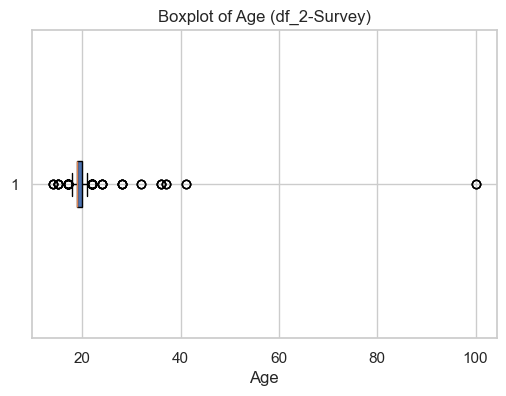

In [64]:
print("Unique Age values:", sorted(df_2["Age"].unique()))
print("Min:", df_2["Age"].min(), "| Max:", df_2["Age"].max())

plt.figure(figsize=(6,4))
plt.boxplot(df_2["Age"], vert=False, patch_artist=True)
plt.title("Boxplot of Age (df_2-Survey)")
plt.xlabel("Age")
plt.show()

In [65]:
df_2 = df_2[df_2["Age"] <= 60]
df_2.shape

(840, 26)

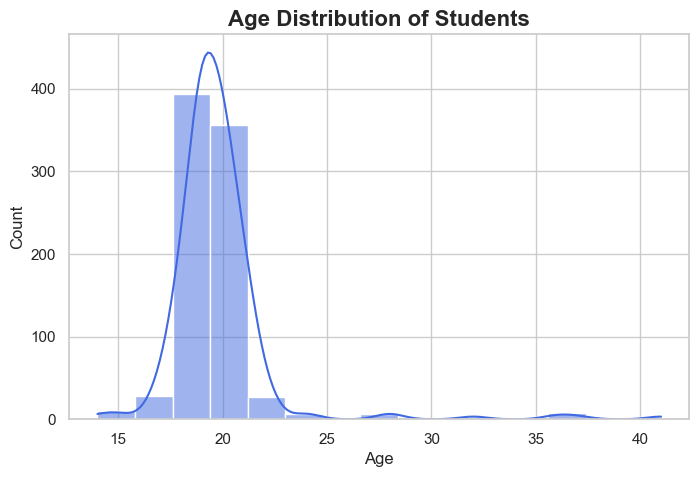

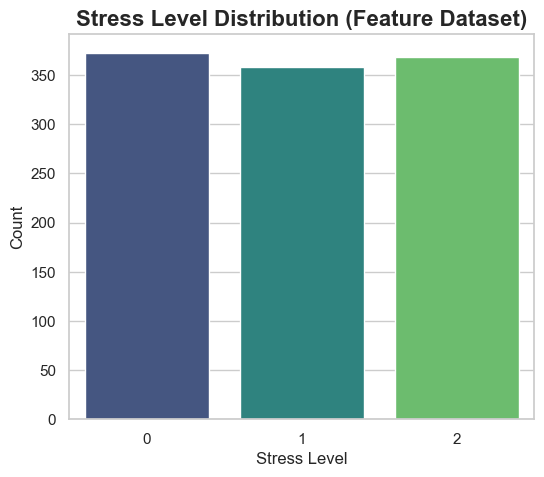

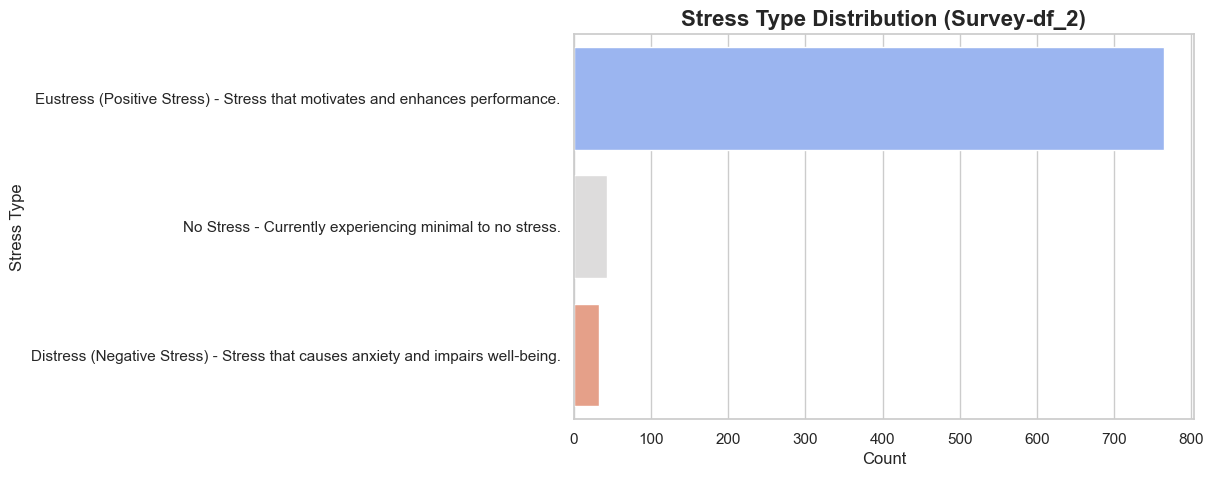

In [66]:
warnings.filterwarnings("ignore")
sns.set_theme(style="whitegrid", palette="muted")

# --- 1. Age distribution ---
plt.figure(figsize=(8,5))
sns.histplot(df_2["Age"], bins=15, kde=True, color="royalblue")
plt.title("Age Distribution of Students", fontsize=16, weight="bold")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

# --- 2. Stress level distribution (df_1) ---
plt.figure(figsize=(6,5))
sns.countplot(x="stress_level", data=df_1, palette="viridis")
plt.title("Stress Level Distribution (Feature Dataset)", fontsize=16, weight="bold")
plt.xlabel("Stress Level")
plt.ylabel("Count")
plt.show()

# --- 3. Stress type distribution (df_2) ---
plt.figure(figsize=(8,5))
sns.countplot(y="Which type of stress do you primarily experience?", 
              data=df_2, order=df_2["Which type of stress do you primarily experience?"].value_counts().index,
              palette="coolwarm")
plt.title("Stress Type Distribution (Survey-df_2)", fontsize=16, weight="bold")
plt.xlabel("Count")
plt.ylabel("Stress Type")
plt.show()

In [ ]:
Погоре имаме визуелизации за распределбата годините на старост, дистрибуција на нивото на стрес каде што може да се види дека има рамномерна распределба и
типовите на стрес со нивната дистрибуција која е добиена од вториот податочен сет со помош на анкетата.

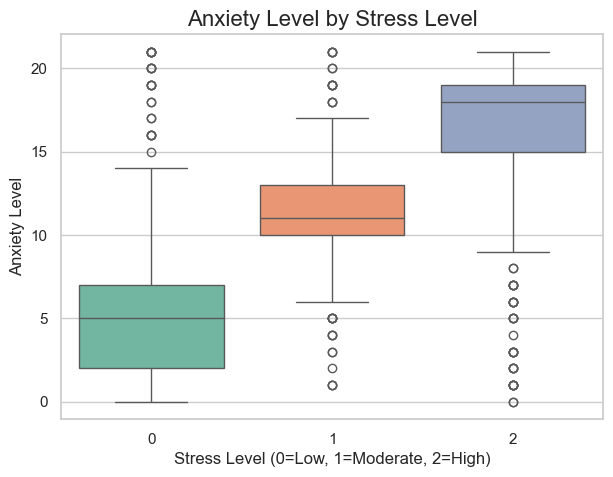

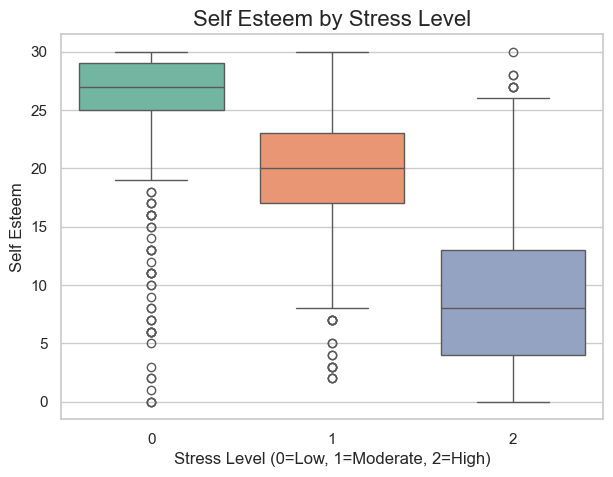

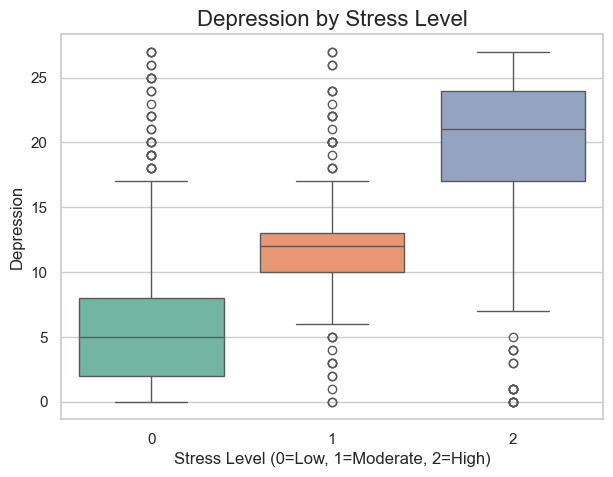

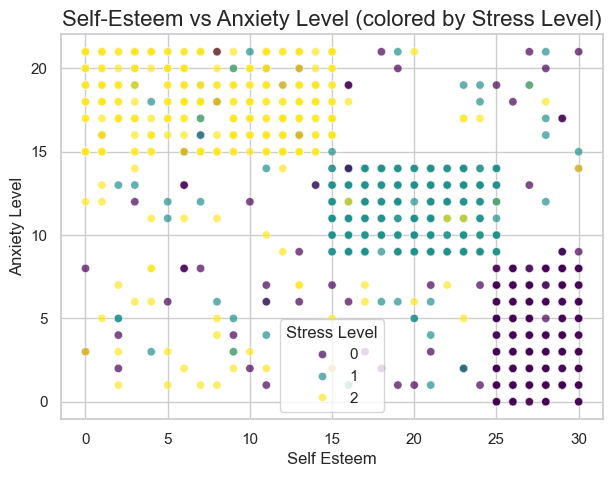

In [67]:
sns.set_theme(style="whitegrid", palette="muted")
plt.rcParams.update({'figure.figsize':(8,5), 'axes.titlesize':16, 'axes.labelsize':12})

psych_cols = ["anxiety_level", "self_esteem", "depression"]
for col in psych_cols:
    plt.figure(figsize=(7,5))
    sns.boxplot(x="stress_level", y=col, data=df_1, palette="Set2")
    plt.title(f"{col.replace('_',' ').title()} by Stress Level")
    plt.xlabel("Stress Level (0=Low, 1=Moderate, 2=High)")
    plt.ylabel(col.replace("_"," ").title())
    plt.show()

# ---Correlation Heatmap (df_1) ---
#plt.figure(figsize=(12,8))
#corr = df_1.corr()
#sns.heatmap(corr, cmap="coolwarm", annot=False, cbar=True)
#plt.title("Correlation Heatmap (df_1)", fontsize=18, weight="bold")
#plt.show()

# ---Scatterplot Example ---
plt.figure(figsize=(7,5))
sns.scatterplot(x="self_esteem", y="anxiety_level", 
                hue="stress_level", palette="viridis", data=df_1, alpha=0.7)
plt.title("Self-Esteem vs Anxiety Level (colored by Stress Level)")
plt.xlabel("Self Esteem")
plt.ylabel("Anxiety Level")
plt.legend(title="Stress Level")
plt.show()

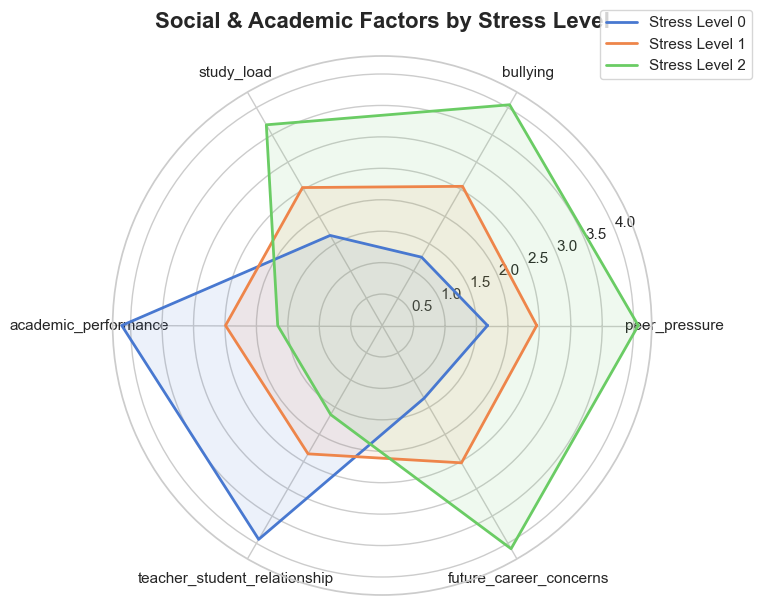

In [68]:
social_academic_cols = ["peer_pressure", "bullying", "study_load",
                        "academic_performance", "teacher_student_relationship", "future_career_concerns"]
avg_by_stress_social_academic = df_1.groupby("stress_level")[social_academic_cols].mean()

def make_radar_chart(data, categories, title):
    N = len(categories)
    angles = np.linspace(0, 2*np.pi, N, endpoint=False).tolist()
    angles += angles[:1] 

    fig, ax = plt.subplots(figsize=(7,7), subplot_kw=dict(polar=True))

    for level, row in data.iterrows():
        values = row.tolist()
        values += values[:1]
        ax.plot(angles, values, linewidth=2, label=f"Stress Level {level}")
        ax.fill(angles, values, alpha=0.1)

    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories, fontsize=11)
    ax.set_title(title, size=16, weight="bold", pad=20)
    ax.legend(loc="upper right", bbox_to_anchor=(1.2, 1.1))
    plt.show()

make_radar_chart(avg_by_stress_social_academic, social_academic_cols, 
                 "Social & Academic Factors by Stress Level")


Социјални и академски фактори
Студентите со висок стрес (Ниво 2) пријавуваат значително повисоки нивоа на:
Притисок од врсници и булинг
Обем на учење и грижи за идната кариера
Студентите со низок стрес (Ниво 0) покажуваат:
Подобри академски перформанси
Посилни односи помеѓу наставници и студенти
Заклучок: Социјалната и академската средина се клучни двигатели на стресот. Студентите кои чувствуваат притисок, се изложени на булинг или се преоптоварени и имаат многу поголема веројатност да искусат високо ниво на стрес.

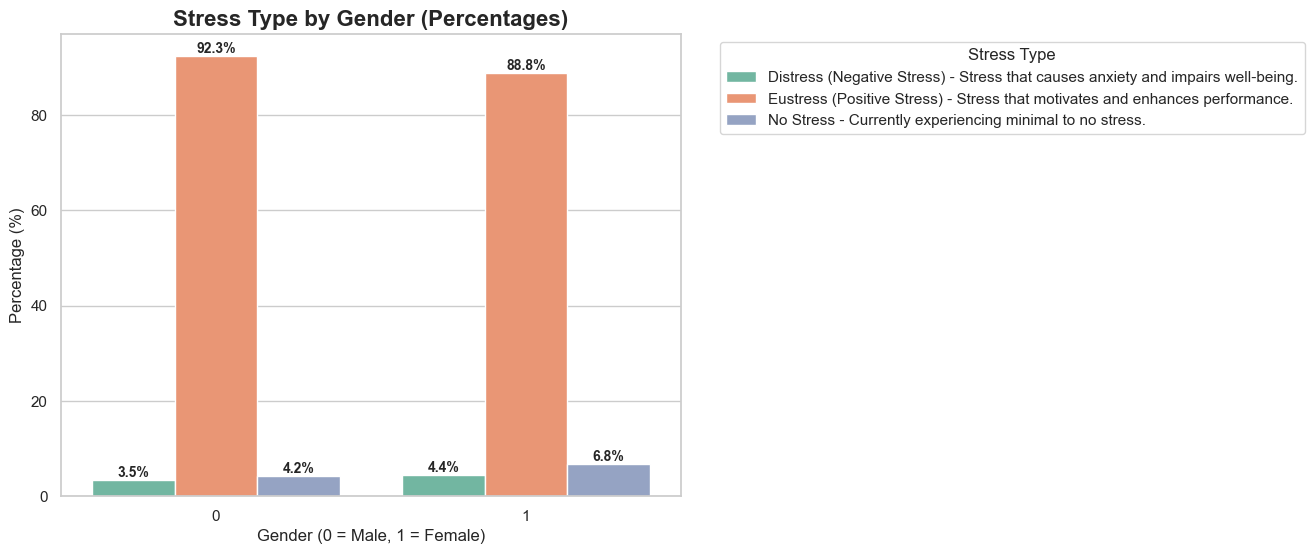

In [70]:
gender_stress_counts = (
    df_2.groupby(["Gender", "Which type of stress do you primarily experience?"])
    .size()
    .reset_index(name="count")
)
gender_totals = gender_stress_counts.groupby("Gender")["count"].transform("sum")
gender_stress_counts["percentage"] = (gender_stress_counts["count"] / gender_totals) * 100

# Plot as percentage
sns.set_theme(style="whitegrid")
plt.figure(figsize=(8,6))
sns.barplot(
    data=gender_stress_counts,
    x="Gender",
    y="percentage",
    hue="Which type of stress do you primarily experience?",
    palette="Set2"
)
plt.title("Stress Type by Gender (Percentages)", fontsize=16, weight="bold")
plt.xlabel("Gender (0 = Male, 1 = Female)")
plt.ylabel("Percentage (%)")
plt.legend(title="Stress Type", bbox_to_anchor=(1.05, 1), loc="upper left")

for p in plt.gca().patches:
    height = p.get_height()
    if height > 0:
        plt.gca().annotate(f'{height:.1f}%', 
                           (p.get_x() + p.get_width()/2., height), 
                           ha='center', va='bottom', fontsize=10, weight="bold")

plt.show()

<Figure size 1000x600 with 0 Axes>

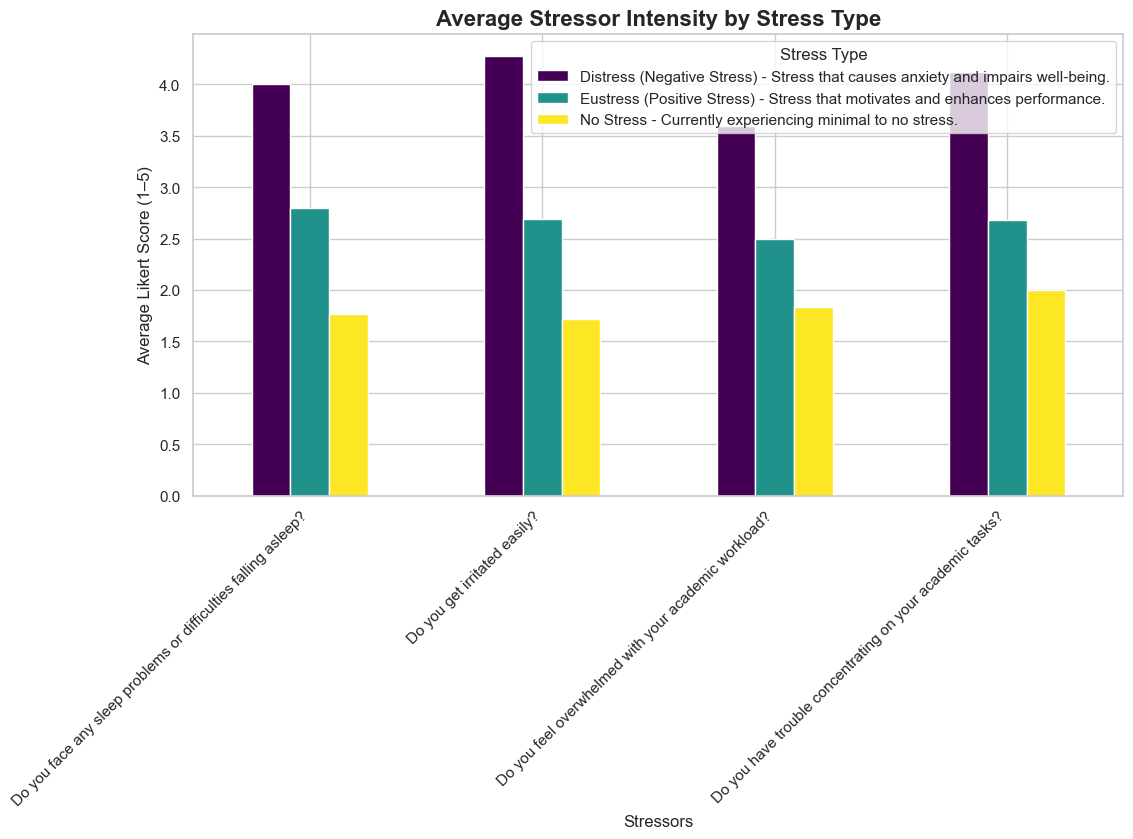

In [71]:
stressors = [
    "Do you face any sleep problems or difficulties falling asleep?",
    "Do you get irritated easily?",
    "Do you feel overwhelmed with your academic workload?",
    "Do you have trouble concentrating on your academic tasks?"
]
avg_stressors = df_2.groupby("Which type of stress do you primarily experience?")[stressors].mean().T

plt.figure(figsize=(10,6))
avg_stressors.plot(kind="bar", figsize=(12,6), colormap="viridis")
plt.title("Average Stressor Intensity by Stress Type", fontsize=16, weight="bold")
plt.ylabel("Average Likert Score (1–5)")
plt.xlabel("Stressors")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Stress Type")
plt.show()

# Heatmap of Correlations

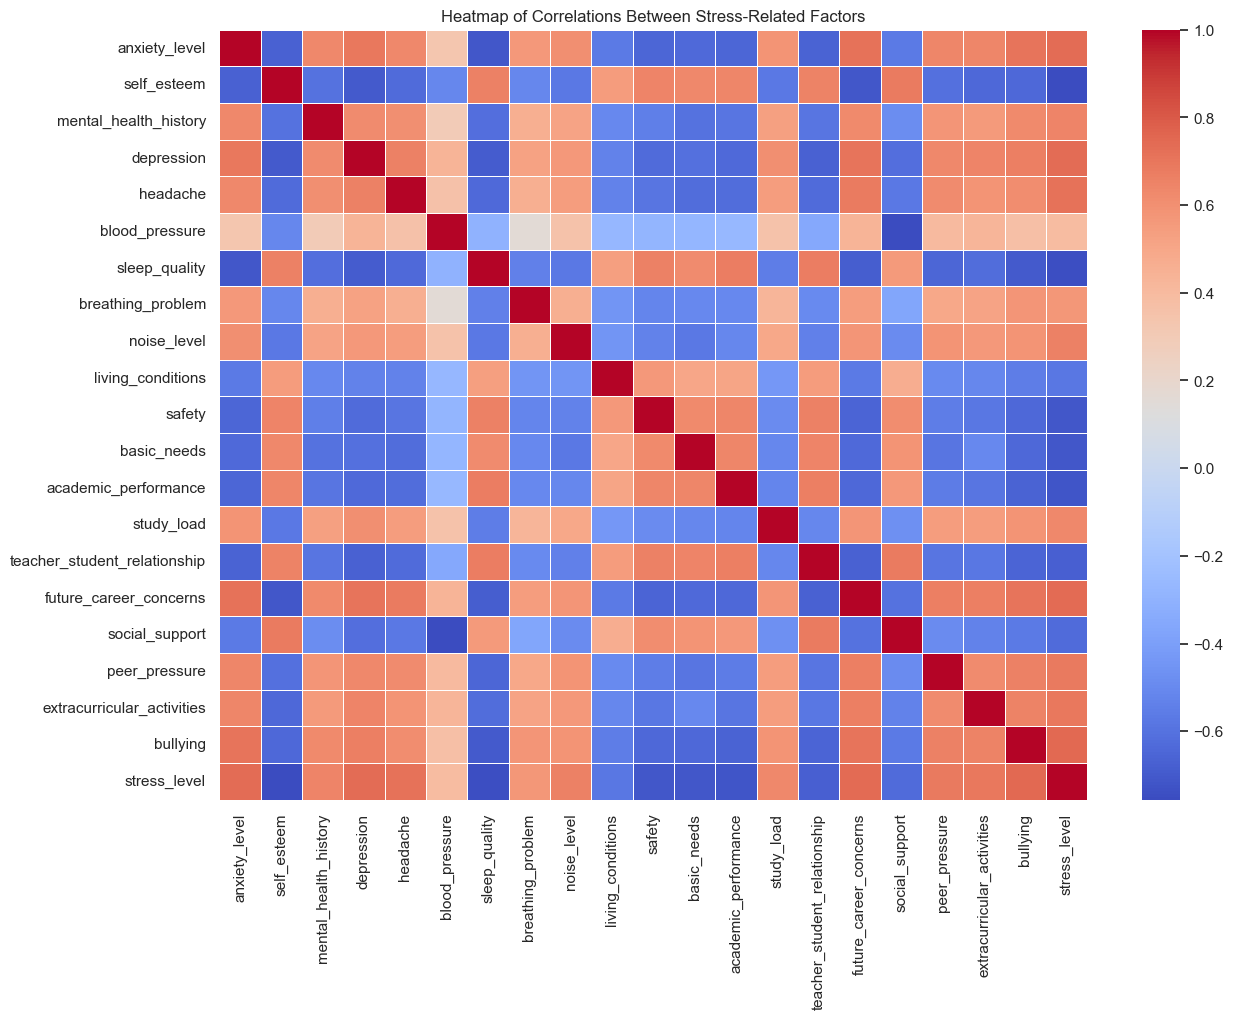

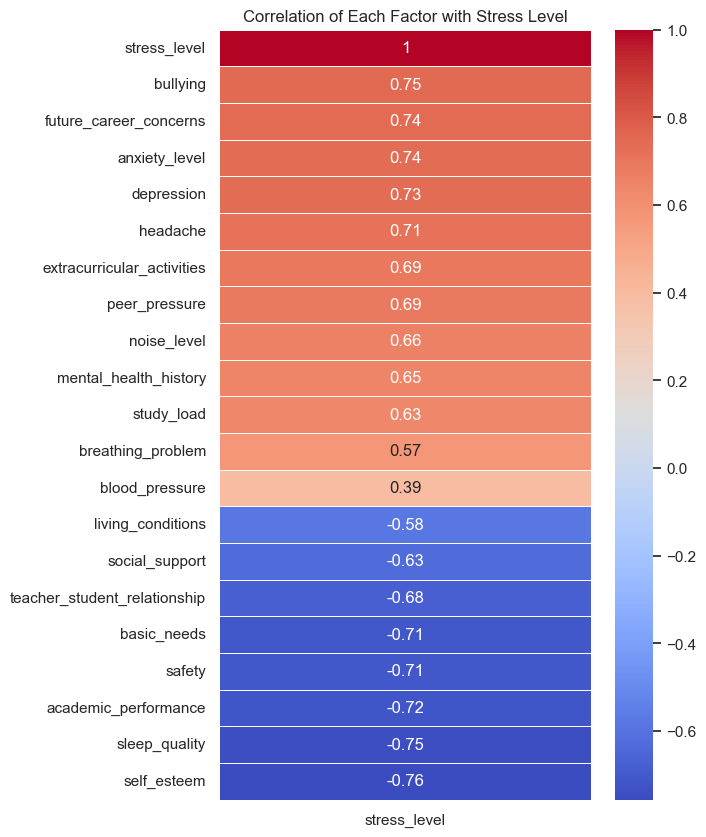

In [72]:
matrix = df_1.corr(method="pearson")

plt.figure(figsize=(14, 10))
sns.heatmap(matrix, annot=False, cmap="coolwarm", linewidths=0.5)
plt.title("Heatmap of Correlations Between Stress-Related Factors")
plt.show()

stress_corr = matrix['stress_level'].sort_values(ascending=False)

plt.figure(figsize=(6, 10))
sns.heatmap(stress_corr.to_frame(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation of Each Factor with Stress Level")
plt.show()

# T-Test for High-Impact Stress Factors

Подолу T-test и неговите визуелзиации ни покажуваат дали две групи студенти имаат различно ниво на стрес. Во нашата анализа се споредуваме студенти со Poor vs Good sleep, Low vs High bullying, Low vs High career concerns и оние со или без историја на ментални проблеми. Резултатите покажуваат дека студентите од групите со Poor sleep, High bullying, High career concerns и историја на ментални проблеми имаат значително повисоко ниво на стрес. П-вредноста ни кажува колку е веројатно оваа разлика да се случила случајно, т.е. многу мала п-вредност (практично 0) значи дека разликата е вистинска и статистички значајна. За T-test се земени променливи (колони) кои најмногу влијаат на стресот т.е. оние колони кои имаат силна позитивна/негативна корелираност според пирсоновата матрица на корелираност.

In [73]:
df = df_1  
ttest_factors = {
    "Sleep Quality (Poor vs Good)": ("sleep_quality", [1,2], [4,5]),
    "Bullying (Low vs High)": ("bullying", [1,2], [4,5]),
    "Career Concerns (Low vs High)": ("future_career_concerns", [1,2], [4,5]),
    "Mental Health History (0 vs 1)": ("mental_health_history", [0], [1])
}

results = []

for label, (col, low_group, high_group) in ttest_factors.items():
    low_vals = df[df[col].isin(low_group)]["stress_level"]
    high_vals = df[df[col].isin(high_group)]["stress_level"]
    t_stat, p_val = ttest_ind(low_vals, high_vals, equal_var=False)
    results.append([label, t_stat, p_val])

ttest_df = pd.DataFrame(results, columns=["Factor", "t-statistic", "p-value"])
ttest_df

,Factor,t-statistic,p-value
0,Sleep Quality (Poor vs Good),36.011448,7.510431e-172
1,Bullying (Low vs High),-38.516800,1.002099e-187
2,Career Concerns (Low vs High),-35.393435,2.769431e-166
3,Mental Health History (0 vs 1),-28.242303,2.461030e-132


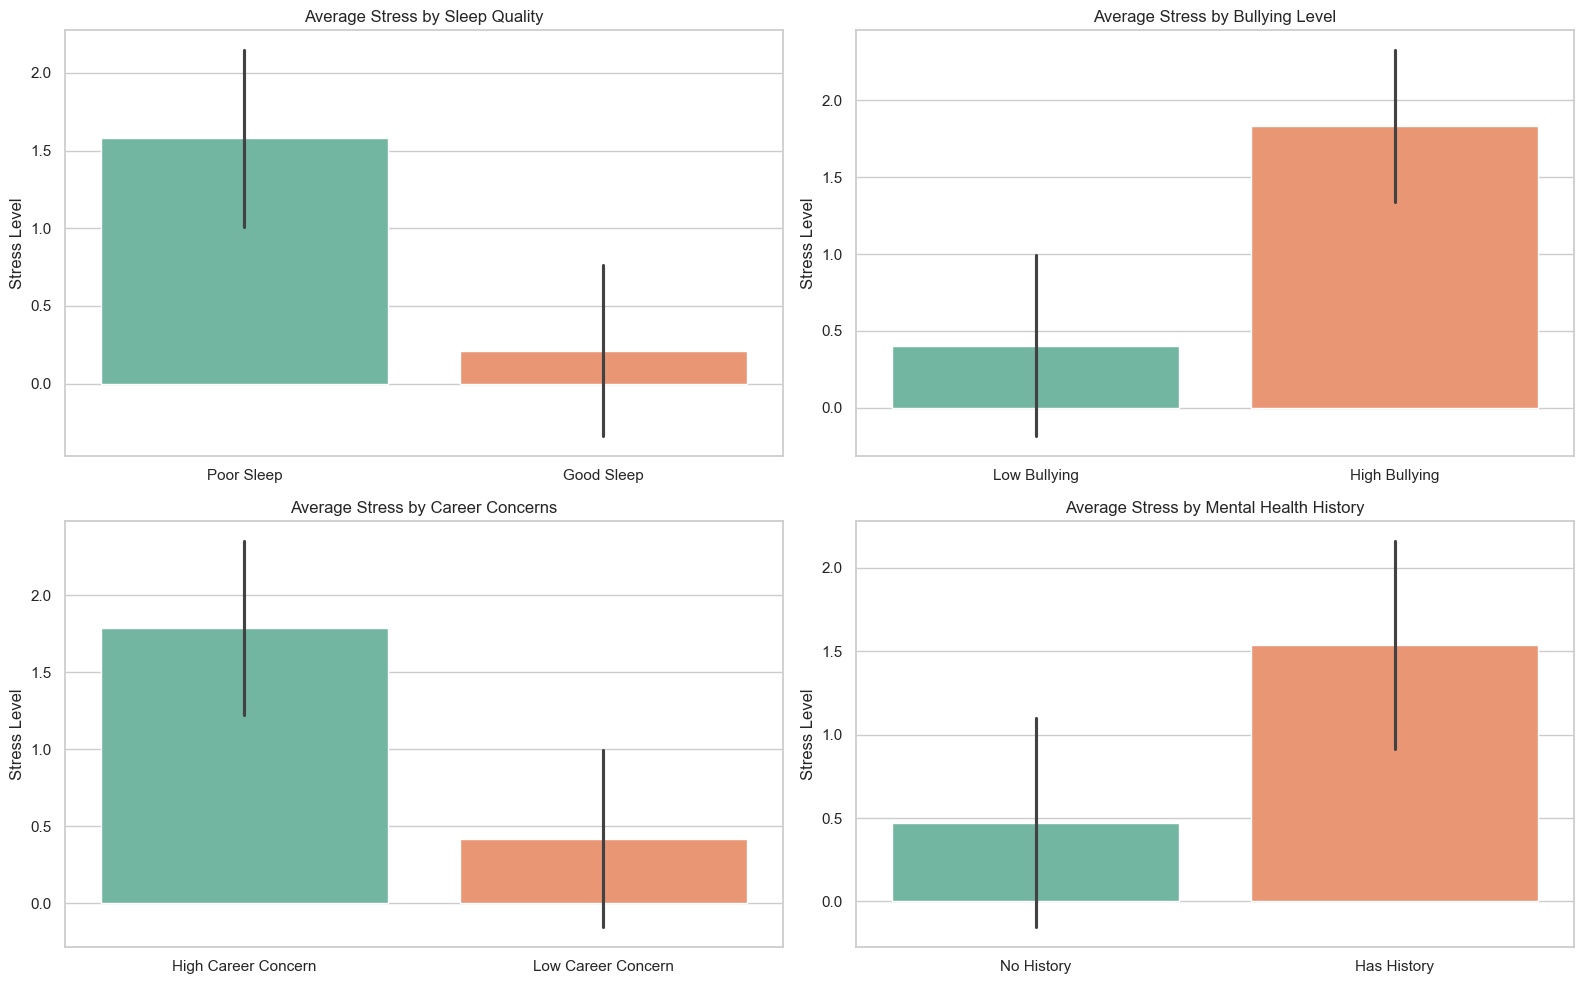

In [74]:
df = df_1  
df['sleep_group'] = df['sleep_quality'].apply(lambda x: 'Poor Sleep' if x in [1,2] else ('Good Sleep' if x in [4,5] else None))
df['bullying_group'] = df['bullying'].apply(lambda x: 'Low Bullying' if x in [1,2] else ('High Bullying' if x in [4,5] else None))
df['career_group'] = df['future_career_concerns'].apply(lambda x: 'Low Career Concern' if x in [1,2] else ('High Career Concern' if x in [4,5] else None))
df['mh_group'] = df['mental_health_history'].apply(lambda x: 'No History' if x == 0 else 'Has History')

plt.figure(figsize=(16, 10))

plt.subplot(2, 2, 1)
sns.barplot(x='sleep_group', y='stress_level', data=df.dropna(subset=['sleep_group']), palette='Set2', ci='sd')
plt.title("Average Stress by Sleep Quality")
plt.xlabel("")
plt.ylabel("Stress Level")

plt.subplot(2, 2, 2)
sns.barplot(x='bullying_group', y='stress_level', data=df.dropna(subset=['bullying_group']), palette='Set2', ci='sd')
plt.title("Average Stress by Bullying Level")
plt.xlabel("")
plt.ylabel("Stress Level")

plt.subplot(2, 2, 3)
sns.barplot(x='career_group', y='stress_level', data=df.dropna(subset=['career_group']), palette='Set2', ci='sd')
plt.title("Average Stress by Career Concerns")
plt.xlabel("")
plt.ylabel("Stress Level")

plt.subplot(2, 2, 4)
sns.barplot(x='mh_group', y='stress_level', data=df.dropna(subset=['mh_group']), palette='Set2', ci='sd')
plt.title("Average Stress by Mental Health History")
plt.xlabel("")
plt.ylabel("Stress Level")

plt.tight_layout()
plt.show()

# ANOVA

ANOVA е тест кој ни покажува дали постои значајна разлика во нивото на стрес помеѓу две или повеќе групи на студенти. За оваа анализа се земени променливи кои имаат силна корелација со стресот и можат да се поделат на повеќе категории: study_load, academic_performance, depression, peer_pressure, living_conditions и teacher_student_relationship. Резултатите покажуваат дека за сите овие фактори постојат значајни разлики во стресот меѓу групите: студенти со поголемо академско оптоварување, понизок академски успех, повисоко ниво на депресија, посилен peer pressure, полоши услови за живеење или полош однос со професорите имаат значително повисок стрес.
F-вредноста ја мери големината на разликата помеѓу групите, а п-вредноста ни покажува дали таа разлика е случајна. Многу мали п-вредности (практично 0) значат дека разликите се статистички значајни и навистина постојат, а не се случајни.

In [75]:
df = df_1 
factors = [
    'study_load',
    'academic_performance',
    'depression',
    'peer_pressure',
    'living_conditions',
    'teacher_student_relationship'
]

anova_results = []

for factor in factors:
    groups = [
        df[df[factor] == level]['stress_level']
        for level in sorted(df[factor].unique())
    ]
    
    f_stat, p_val = stats.f_oneway(*groups)
    anova_results.append([factor, f_stat, p_val])

anova_df = pd.DataFrame(anova_results, columns=['Factor', 'F-statistic', 'p-value'])
anova_df

,Factor,F-statistic,p-value
0,study_load,211.262263,9.710472e-158
1,academic_performance,345.969540,2.503996e-222
2,depression,72.137141,3.147116e-219
3,peer_pressure,273.658863,7.630564e-190
4,living_conditions,240.039105,4.380039e-173
5,teacher_student_relationship,336.881111,1.761330e-218


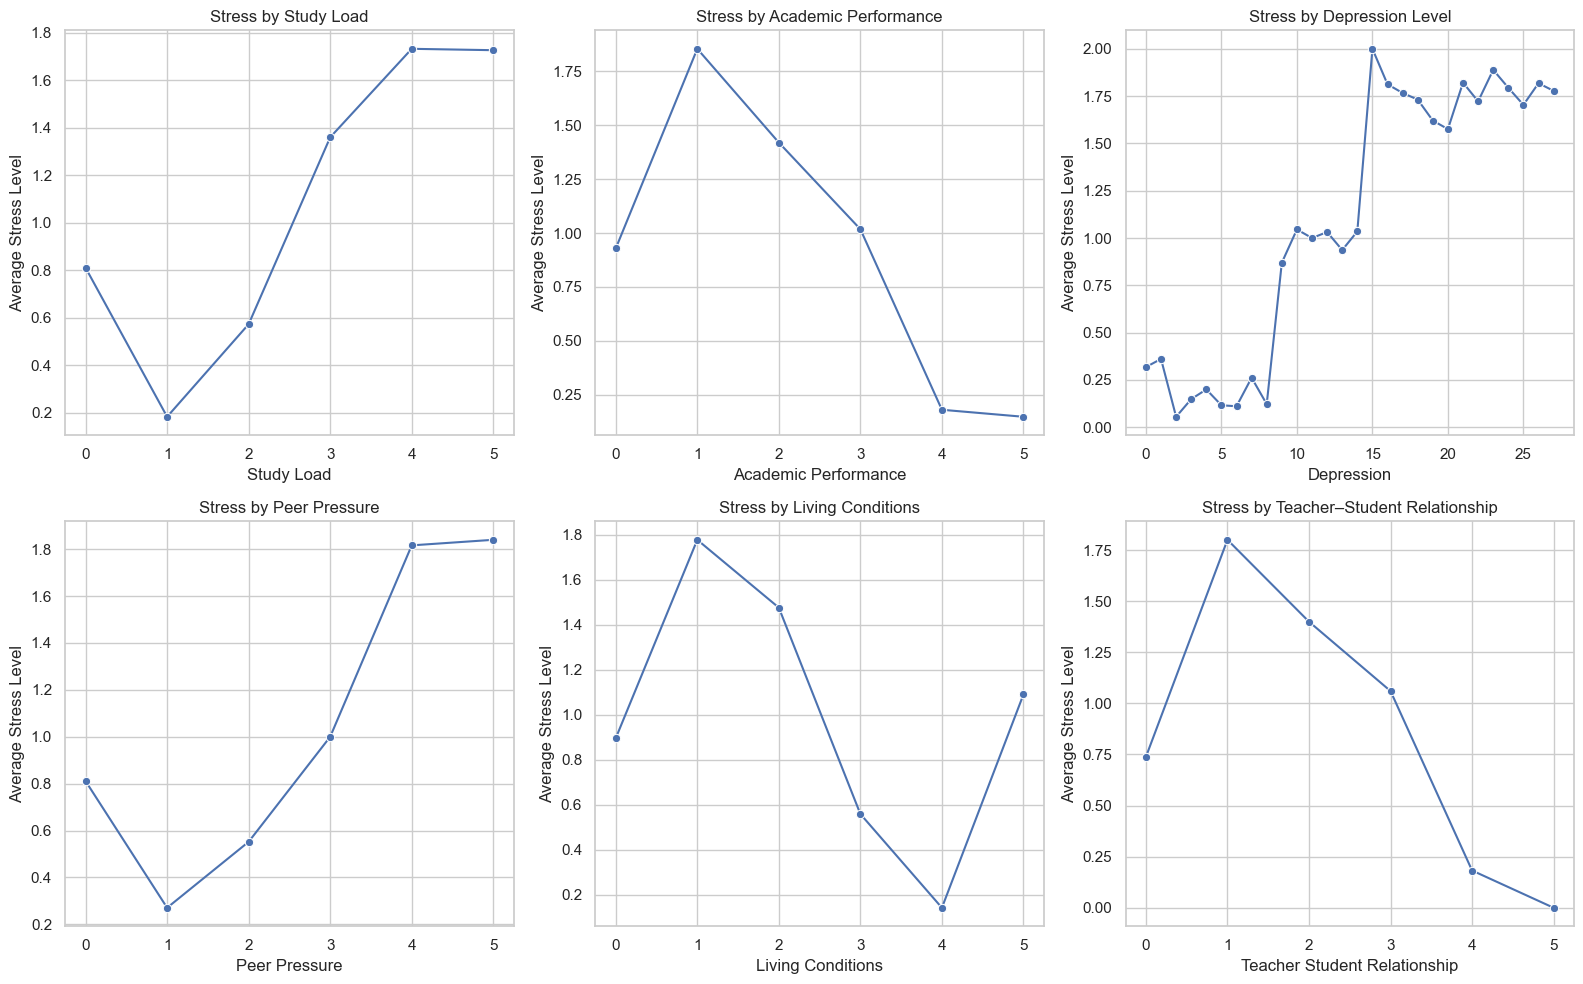

In [76]:
df = df_1  
factors = [
    'study_load',
    'academic_performance',
    'depression',
    'peer_pressure',
    'living_conditions',
    'teacher_student_relationship'
]

titles = [
    "Stress by Study Load",
    "Stress by Academic Performance",
    "Stress by Depression Level",
    "Stress by Peer Pressure",
    "Stress by Living Conditions",
    "Stress by Teacher–Student Relationship"
]

plt.figure(figsize=(16, 10))

for i, factor in enumerate(factors):
    avg_df = df.groupby(factor)['stress_level'].mean().reset_index()
    
    plt.subplot(2, 3, i+1)
    sns.lineplot(
        x=factor,
        y='stress_level',
        data=avg_df,
        marker='o'
    )
    plt.title(titles[i])
    plt.xlabel(factor.replace("_", " ").title())
    plt.ylabel("Average Stress Level")
    plt.grid(True)

plt.tight_layout()
plt.show()

Овие резултати сугерираат дека стресот е мултифакторски проблем кај студентите, каде што и академските и личните околности играат значајна улога.

# KMeans Clusters of Students Based on Stress-Related Factors

KMeans кластеризацијата ги групира студентите во три категории според нивото на стрес: Low Stress, Moderate Stress и High Stress. Како влезни променливи се земени anxiety_level, depression, peer_pressure, sleep_quality, academic_performance, future_career_concerns, bullying и study_load, бидејќи тие најмногу влијаат на стресот и покриваат психолошки, академски и социјални фактори според претходните тестови и анализи. PCA (Principal Component Analysis) се користи за да се намали бројот на димензии, X-оската покажува општото ниво на стрес, а Y-оската баланс помеѓу психолошкото благосостојба и академското оптоварување. На графикот, секоја точка е студент, а бојата ја покажува кластер групата, што овозможува лесно да се види кои студенти се најранливи на висок стрес.

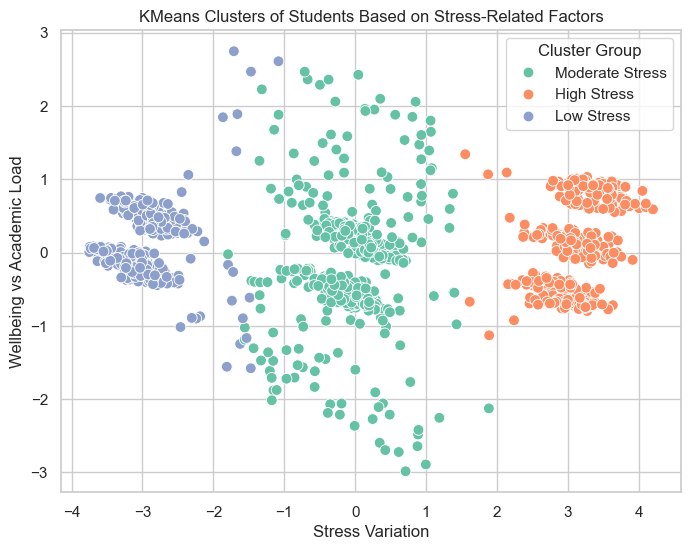

In [79]:
features = [
    'anxiety_level', 'depression', 'peer_pressure', 'sleep_quality',
    'academic_performance', 'future_career_concerns',
    'bullying', 'study_load'
]

X = df_1[features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X_scaled)
df_1['cluster'] = labels

pca = PCA(n_components=2)
pca_coords = pca.fit_transform(X_scaled)

df_1['PCA1'] = pca_coords[:, 0]
df_1['PCA2'] = pca_coords[:, 1]

cluster_names = {
    0: "Moderate Stress",
    1: "High Stress",
    2: "Low Stress"
}

df_1['cluster_label'] = df_1['cluster'].map(cluster_names)

plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='PCA1',
    y='PCA2',
    hue='cluster_label',
    palette='Set2',
    data=df_1,
    s=60
)
plt.title("KMeans Clusters of Students Based on Stress-Related Factors")
plt.xlabel("Stress Variation")
plt.ylabel("Wellbeing vs Academic Load")
plt.legend(title="Cluster Group")
plt.show()

Хоризонтална оска (X): Колку варира стресот кај студентот - лево = помалку стрес, десно = повеќе стрес  

Вертикална оска (Y): Колку добро се справуваат со учењето - горе = добро се справуваат, долу = тешко им оди

Графиконот покажува дека не сите студенти се исти - некои се опуштени, некои се умерено стресирани, некои многу стресирани. Секоја група има свои карактеристики и би требало да добие различен вид на помош и поддршка.

"Moderate stress" не значи "ист стрес". Оваа група е всушност најкомплексна и најразновидна. Затоа овој кластер е најмногу "расфрлан".

## Identifying Key Factors of Student Stress Using Feature Importance, PCA and DBSCAN

Според резултатите од Feature Importance преку PCA, можеме да видиме дека најголемо влијание врз варијацијата на податоците и кластеризацијата го имаат факторите како `stress_level`, `future_career_concerns`, `anxiety_level`, `bullying`, `depression`, `self_esteem` и `sleep_quality`. Овие променливи носат најмногу информации за психолошкото, социјалното и академското оптоварување на студентите.

PCA (Principal Component Analysis) е техника која се користи за намалување на димензиите на податоците и за идентификација на главните извори на варијација во dataset-от. Во овој случај, го користевме PCA за да откриеме кои променливи носат најмногу информации за психолошкото, академското и социјалното оптоварување на студентите. Сите бројчани променливи се стандардираат пред анализа, а првата компонента (PC1) објаснува најголем дел од варијацијата во податоците. Feature Importance се добива како апсолутна тежина на секоја променлива во првата компонента, при што повисоката тежина покажува поголемо влијание.

Овој пристап се разликува од KMeans кластеризацијата која користеше претходно селектирани фактори базирани на корелација и релевантност со стресот, како и од T-test и ANOVA анализите кои се фокусираа на статистички значајни разлики помеѓу групи. PCA овозможува холистички пристап, бидејќи ги разгледува сите бројчани променливи од dataset-от заедно и идентификува кои носат најмногу варијација и информации, без ограничување само на најсилно корелираните или статистички значајни фактори. Овие најинформативни променливи потоа можат да се користат за понатамошна анализа, како на пример кластеризација со DBSCAN, овозможувајќи откривање на природни групи на студенти според нивниот психолошки, социјални и академски профил.

Feature Importance:
stress_level                    0.251708
future_career_concerns          0.239296
anxiety_level                   0.236226
bullying                        0.235173
depression                      0.234803
self_esteem                     0.234633
sleep_quality                   0.232955
teacher_student_relationship    0.228228
academic_performance            0.222579
headache                        0.222317
safety                          0.222169
basic_needs                     0.219881
peer_pressure                   0.219112
extracurricular_activities      0.218722
mental_health_history           0.211538
social_support                  0.210178
noise_level                     0.202713
study_load                      0.197984
living_conditions               0.191761
breathing_problem               0.183809
blood_pressure                  0.139415
dtype: float64


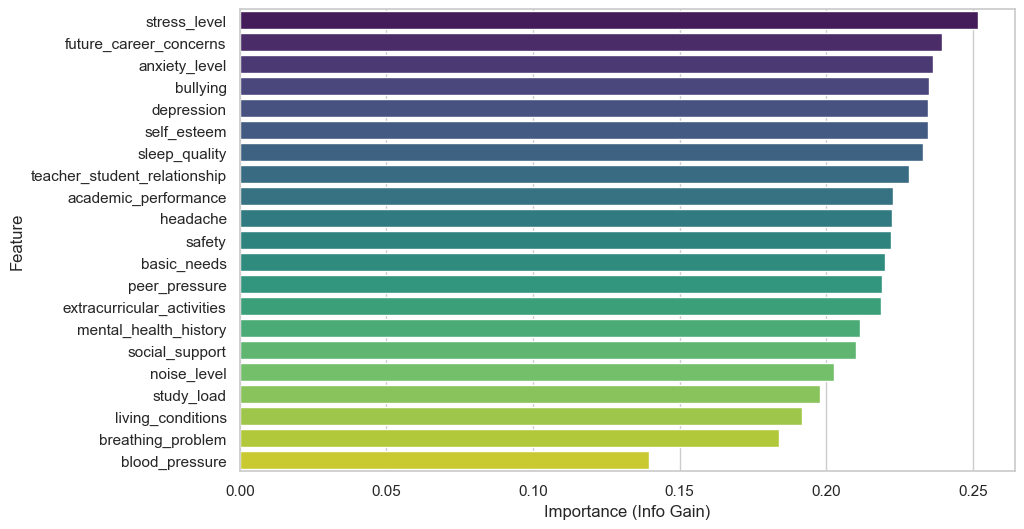

In [90]:
exclude_cols = ['PCA1', 'PCA2', 'cluster', 'DBSCAN_cluster', 'DBSCAN_cluster_label', 'cluster_label']
numeric_cols = df_1.select_dtypes(include=[np.number]).columns
feature_cols = [col for col in numeric_cols if col not in exclude_cols]

X = df_1[feature_cols]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA()
pca.fit(X_scaled)

feature_importance = pd.Series(np.abs(pca.components_[0]), index=feature_cols).sort_values(ascending=False)
print("Feature Importance:")
print(feature_importance)

plt.figure(figsize=(10,6))
sns.barplot(x=feature_importance.values, y=feature_importance.index, palette="viridis")
plt.xlabel("Stress & Psychological Load (PCA 1)")
plt.xlabel("Importance (Info Gain)")
plt.ylabel("Feature")
plt.show()

## DBSCAN Clustering Using PCA Feature Importance

За кластеризацијата со DBSCAN ги избравме променливите кои носат најмногу информации за варијацијата на податоците според Feature Importance од PCA. Овие променливи се: stress_level, future_career_concerns, anxiety_level, bullying, depression, self_esteem, sleep_quality, teacher_student_relationship, academic_performance, headache, safety, basic_needs, peer_pressure, extracurricular_activities, mental_health_history и social_support.

Овој пристап овозможува наместо да се изберат само најсилно корелираните или статистички значајни променливи, холистичкиот пристап значи дека се разгледуваат сите нумерички колони заедно, бидејќи PCA ја анализира целата нумеричка структура на податоците и идентификува кои колони носат најмногу информации, наместо да се ограничиме само на најсилно корелираните или статистички значајни фактори. DBSCAN потоа користи променливи кои носат најмногу информација за да идентификува природни групи на студенти со низок, умерен и висок стрес, што овозможува појасна и поточна кластеризација.

Визуелизацијата е направена преку PCA 2D компоненти, каде што X-оската ја прикажува оптовареноста со стрес и психолошки фактори, а Y-оската ја покажува благосостојбата во однос на академскиот притисок.

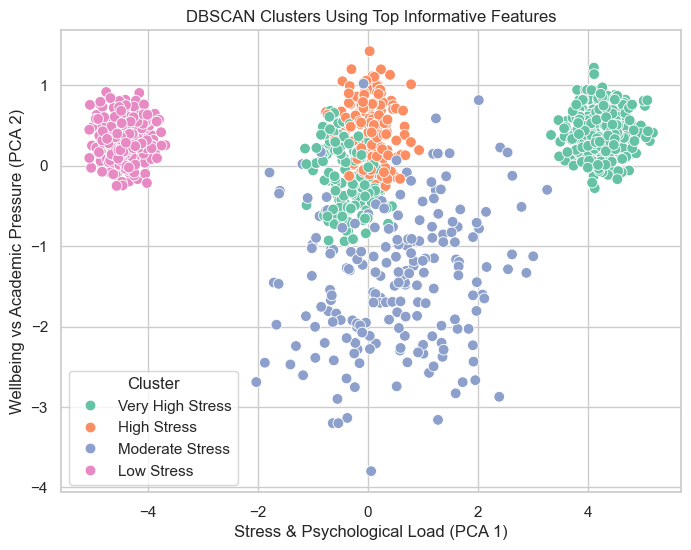

In [96]:
top_features = [
    'stress_level', 'future_career_concerns', 'anxiety_level', 'bullying',
    'depression', 'self_esteem', 'sleep_quality', 'teacher_student_relationship',
    'academic_performance', 'headache', 'safety', 'basic_needs', 'peer_pressure',
    'extracurricular_activities', 'mental_health_history', 'social_support'
]

X_top = df_1[top_features]

scaler = StandardScaler()
X_scaled_top = scaler.fit_transform(X_top)

# DBSCAN кластеризација
dbscan = DBSCAN(eps=2, min_samples=5)
df_1['DBSCAN_cluster'] = dbscan.fit_predict(X_scaled_top)

pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_scaled_top)

cluster_means = df_1.groupby('DBSCAN_cluster')['stress_level'].mean().sort_values()
cluster_name_map = {}
names = ["Low Stress", "Moderate Stress", "High Stress"]
for i, cluster in enumerate(cluster_means.index):
    if i < len(names):
        cluster_name_map[cluster] = names[i]
    else:
        cluster_name_map[cluster] = "Very High Stress"

df_1['DBSCAN_cluster_label'] = df_1['DBSCAN_cluster'].map(cluster_name_map)

plt.figure(figsize=(8,6))
sns.scatterplot(
    x=X_pca_2d[:,0], 
    y=X_pca_2d[:,1], 
    hue=df_1['DBSCAN_cluster_label'], 
    palette='Set2', 
    s=60
)
plt.title("DBSCAN Clusters Using Top Informative Features")
plt.xlabel("Stress & Psychological Load (PCA 1)")
plt.ylabel("Wellbeing vs Academic Pressure (PCA 2)")
plt.legend(title="Cluster")
plt.show()

Иако оригиналниот датасет ги класифицира студентите во 3 категории (Low, Moderate, High Stress), DBSCAN алгоритмот ги анализира сите фактори комбинирано, алгоритмот забележува дека внатре во "High Stress" категоријата всушност постојат два различни подтипови на студенти High Stress и Very High Stress.

High Stress - Студенти со висок стрес, но со релативно подобра психолошка состојба, поддршка од професори, и подобар сон

Very High Stress- Студенти со висок стрес плус висока анксиозност, депресија, лош сон, слаба социјална поддршка - комбинација која ги прави уникатни и во уште потешка состојба.

Low Stress - Студенти со низок стрес и мирни се. Компактна група лево горе.

Moderate Stress - Најголемата и најраспрснатата група со умерен стрес. Многу различни студенти со различни искуства, распрснати низ долниот дел на графикот.